##### The 🤗 Transformers library provides the functionality to create and use those shared models.

##### The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

In [ ]:
!pip install -qU transformers datasets peft accelerate bitsandbytes trl evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.0/411.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.7/335.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install transformers[sentencepiece] #development version for all use-cases

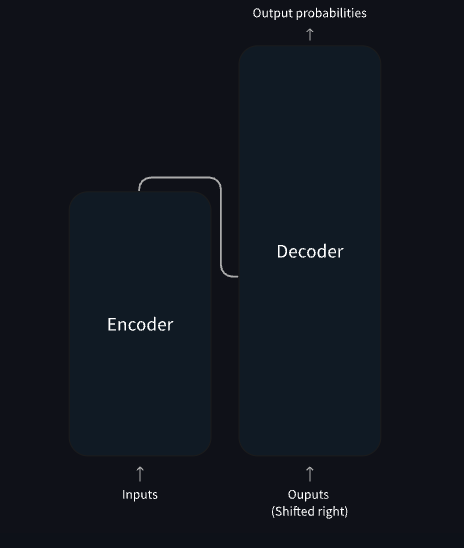

In [ ]:
import torch

In [ ]:
import transformers
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

##### By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

1. The text is preprocessed into a format the model can understand.
2. The preprocessed inputs are passed to the model.
3. The predictions of the model are post-processed, so you can make sense of them.

There are many available pipelines for different purposes that can be explored here: https://huggingface.co/docs/transformers/main/en//main_classes/pipelines


In [ ]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

#### Understanding pipelines
##### Pipelines have 3 steps as follows

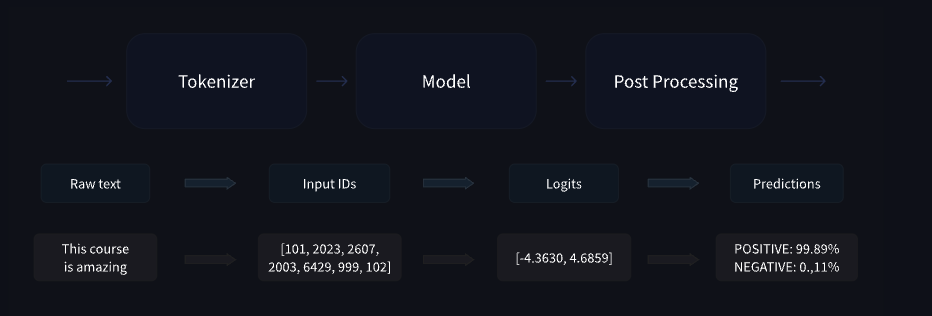

In [ ]:
# 1. Preprocessing with the tokenizer

from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)


{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [ ]:
# 2. Going thorugh the model

from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


##### In the above vector output, we have 3 dimensions. The batch size, Sequence length, hidden size.

##### The above is said to be high dimensions due to the last value (vector dimension of each model input). The hidden size can be very large (768 is common for smaller models, and in larger models this can reach 3072 or more). For each model input, we’ll retrieve a high-dimensional vector representing the contextual understanding of that input by the Transformer model.

What is the problem with the above output?

In [ ]:
# Output linked to classification problem
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.logits) # will give raw unnormalized scores

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


In [ ]:
# 3. Postprocessing the output
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

##### Lets compare different tokenizer and their uses
Tokenizers are one of the core components of the NLP pipeline. They serve one purpose: to translate text into data that can be processed by the model. Models can only process numbers, so tokenizers need to convert our text inputs to numerical data.


In [ ]:
# tokenizing the data - word based tokenization

tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


#### The goal when crafting the vocabulary is to do it in such a way that the tokenizer tokenizes as few words as possible into the unknown token.

One way to reduce the amount of unknown tokens is to go one level deeper, using a *character-based tokenizer*.

But if you want to get the best of both worlds, we can use a hird technique that combines the two approaches: *subword tokenization.* Subword tokenization algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords.

Let's use a tool to visualize the different types of tokenizers used : https://huggingface.co/spaces/Xenova/the-tokenizer-playground

In [ ]:
# Loading and Saving Tokenizers

# Method 1

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# Method 2

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

#### Tokenization pipeline - Translating text into numbers is encoding. Encoding is done in a two-step process: the tokenization, followed by the conversion to input IDs.

In [ ]:
# tokenize method handles the tokenization process

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

# conversion to input id()
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']
[7993, 170, 13809, 23763, 2443, 1110, 3014]


In [ ]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple


| **Special Token** | **Purpose**                             | **ID** |
|--------------------|-----------------------------------------|--------|
| `[CLS]` / ``    | Marks the beginning of a sequence       | 101    |
| `[SEP]` / ``   | Separates different parts of a sequence | 102    |
| `[PAD]` / ``  | Padding token for equal-length batches  | 0      |
| `[UNK]` / ``  | Represents unknown/out-of-vocabulary words | 100    |
| `[MASK]` / ``| Used for masked language modeling       | 103    |
| `[EOS]` / ``   | End of sequence token                  | 2      |
| `[BOS]` / ``    | Beginning of sequence token            | 1      |

##### Parameters within the tokenizer method

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
model_inputs = tokenizer(sequence)
print(model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]


In [ ]:
# Special token
print(tokenizer.decode(model_inputs["input_ids"]))
print(tokenizer.decode(ids))

[CLS] i've been waiting for a huggingface course my whole life. [SEP]
i've been waiting for a huggingface course my whole life.




```
# Will pad the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")

# Will pad the sequences up to the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, padding="max_length")

# Will pad the sequences up to the specified max length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8)
```





```
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Will truncate the sequences that are longer than the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, truncation=True)

# Will truncate the sequences that are longer than the specified max length
model_inputs = tokenizer(sequences, max_length=8, truncation=True)
```





```
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Returns PyTorch tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="pt")

# Returns TensorFlow tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="tf")

# Returns NumPy arrays
model_inputs = tokenizer(sequences, padding=True, return_tensors="np")
```



### Model Embeddings

Embeddings vs Tokenizers: Key Differences

Tokenizers

- Function: Convert raw text into numerical tokens (subwords/words) using vocabulary

- Output: Token IDs and attention masks

- Example: "Hello world!" → [101,[7592][2088][102]

- Hugging Face Class: AutoTokenizer

Embeddings

- Function: Map token IDs to dense vector representations

- Output: High-dimensional vectors (e.g., 384D for MiniLM)

- Purpose: Capture semantic meaning in numerical form

- Location: First layer of neural networks

- Key Difference: The AutoTokenizer only handles text → token conversion. Embeddings are generated by the model using learned parameters after tokenization.

Let's take an example of using a contextual embeddings model like "sentence-transformers/all-MiniLM-L6-v2"

In [ ]:
from transformers import AutoTokenizer, AutoModel

model_name = "sentence-transformers/all-MiniLM-L6-v2"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

text = "Hugging Face embeddings are powerful"
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

print(inputs)

{'input_ids': tensor([[  101, 17662,  2227,  7861,  8270,  4667,  2015,  2024,  3928,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
with torch.no_grad():
    outputs = model(**inputs)

# Get last hidden state (embedding)
last_hidden_state = outputs.last_hidden_state
print(f"Embedding shape: {last_hidden_state.shape}")  # [1, 7, 384]
print(f"Embeddings:{last_hidden_state}")

Embedding shape: torch.Size([1, 10, 384])
Embeddings:tensor([[[-0.1615, -0.0869,  0.3339,  ...,  0.0344, -0.1535,  0.2642],
         [ 0.4211,  0.5676,  0.9404,  ..., -0.4839, -0.0301,  1.1396],
         [-0.4292,  0.0209,  0.3314,  ..., -0.4177, -0.0919,  0.8848],
         ...,
         [-0.3632,  0.0995,  0.5172,  ...,  0.0302,  0.1060,  0.6064],
         [ 0.0743,  0.4915,  0.1316,  ...,  0.3781,  0.3000,  0.4122],
         [-0.1306, -0.0709,  0.5869,  ...,  0.1555, -0.4285,  0.2043]]])


In [ ]:
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

embedding = get_embedding("Natural language processing is fascinating")
print(embedding.shape)  # (1, 384)

(1, 384)


Use Case : Finding the Cosine Similarity between two sentences using their embeddings

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

emb1 = get_embedding("machine learning")
emb2 = get_embedding("artificial intelligence")
similarity = cosine_similarity(emb1, emb2)
print(f"Similarity: {similarity[0][0]:.2f}")

Similarity: 0.70


#### In the next section, we will look into creating a model.

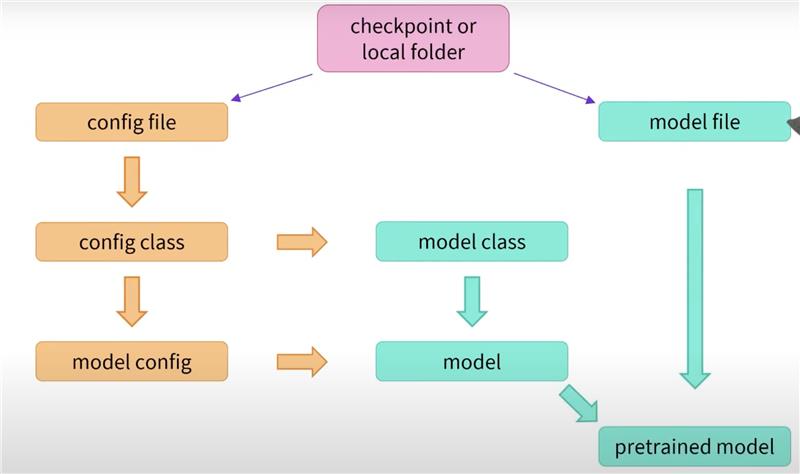

Source : https://huggingface.co/learn/nlp-course/en/chapter2/3?fw=pt

In [ ]:
from transformers import BertConfig, BertModel
# Config of an Encoder Model
# Building the config
config = BertConfig()
# Building the model from the config
print(config)

BertConfig {
  "_attn_implementation_autoset": true,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.50.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [ ]:
from transformers import LlamaConfig, LlamaModel
# Config for an decoder only model
llama_config = LlamaConfig()

# Building the LLAMA model from the configuration
print(llama_config)

LlamaConfig {
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "eos_token_id": 2,
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 4096,
  "initializer_range": 0.02,
  "intermediate_size": 11008,
  "max_position_embeddings": 2048,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 32,
  "num_key_value_heads": 32,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-06,
  "rope_scaling": null,
  "rope_theta": 10000.0,
  "tie_word_embeddings": false,
  "transformers_version": "4.50.3",
  "use_cache": true,
  "vocab_size": 32000
}



In [ ]:
from transformers import T5Config, T5Model
#Config for an enc-dec model
tf_config = T5Config()
print(tf_config)

T5Config {
  "classifier_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 512,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "num_decoder_layers": 6,
  "num_heads": 8,
  "num_layers": 6,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "transformers_version": "4.50.3",
  "use_cache": true,
  "vocab_size": 32128
}



##### The model can be used in this state, but it will output gibberish; it needs to be trained first.

In [ ]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
# Using the model for inference
sequences = ["Hello!", "Cool.", "Nice!"]

encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

model_inputs = torch.tensor(encoded_sequences)
output = model(model_inputs)


## From tokenizer to model

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load SmolLM 135M Instruct model
checkpoint = "HuggingFaceTB/SmolLM-135M-Instruct"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForCausalLM.from_pretrained(checkpoint)

# Prompt
input_text = "Explain what a transformer is in simple words"
inputs = tokenizer(input_text, return_tensors="pt")

# Generate continuation
generated_ids = model.generate(
    inputs["input_ids"],
    max_new_tokens=100,
    do_sample=True,
    temperature=0.7,
    top_p=0.9
)

# Decode output
output_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print(output_text)

tokenizer_config.json:   0%|          | 0.00/3.59k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Explain what a transformer is in simple words.

**What is a transformer?**

A transformer is a device that changes the direction of a magnetic field. It's a crucial component in electrical power systems, and understanding its operation is essential to appreciate the importance of transformers.

**How does a transformer work?**

A transformer is an electrical device that changes the direction of a magnetic field. It consists of a coil (a coil is a coil of wire) that is wound around a core (a core is a fer


# Loading LLaMa with quantizations

In [ ]:
!pip install rouge_score

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(
    "unsloth/llama-3.2-1b-instruct",
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

tokenizer = AutoTokenizer.from_pretrained(
    "unsloth/llama-3.2-1b-instruct",
    padding_side="left",
    truncation_side="left"
)

tokenizer.chat_template = """{% for message in messages %}
{{'<|begin_of_text|>' if loop.first else ''}}
{{'<|start_header_id|>' + message['role'] + '<|end_header_id|>' + '\n\n'}}
{{message['content']|trim + '<|eot_id|>'}}
{% endfor %}
<|start_header_id|>assistant<|end_header_id|>\n\n"""

messages = [{"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Explain quantum entanglement to a 5-year-old"}]

inputs = tokenizer.apply_chat_template(
    messages,
    return_tensors="pt",
    add_generation_prompt=True
).to(model.device)

outputs = model.generate(
    inputs,
    max_new_tokens=256,
    temperature=0.7,
    repetition_penalty=1.1,
    do_sample=True
)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]


user


Explain quantum entanglement to a 5-year-old
assistant
Oh boy, are you ready for a cool science secret? 

You know how we can see our friends and family who live far away on TV or phone calls? Well, tiny particles like atoms and even some tiny animals can also be connected in special ways. This is called "quantum entanglement".

Imagine you have two toy cars that are very close together. If you push one car really hard, the other car will move too because they're connected by something called "a spring". But if you do anything with the first car, like pushing it harder, the second car doesn't change at all! It's like the two cars are talking to each other in a special way.

Now, imagine these toy cars are not just any ordinary cars, but actually tiny particles of an atom. When scientists do experiments with them, they find out that even though they're very, very far apart, they can still talk to each other in a special way!

For example, when scientists try to send a signal fro

# LLM Instruction Finetuning

Supervised finetuning (SFT) aligns LLMs by training them on labeled datasets of (input, output) pairs, ensuring they follow instructions accurately and produce desired responses. Unlike pretraining (which teaches general language patterns), SFT specializes the model for specific tasks—like financial analysis or medical Q&A—by fine-tuning on curated examples. This is a key step in instruction alignment, making models more controllable and reliable before advanced techniques like RLHF. We’ve covered SFT earlier as the foundation for task-specific adaptation (in the instruction finetuning part), bridging raw pretraining and human preference alignment (e.g., RLHF/DPO).



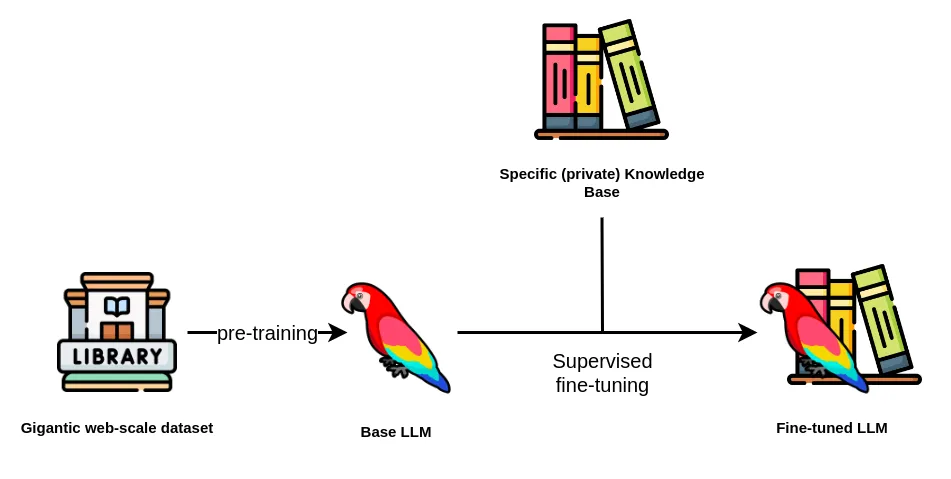

https://medium.com/mantisnlp/supervised-fine-tuning-customizing-llms-a2c1edbf22c3

Instruction Finetuning : Effective technique to adapt pre-trained LLMs to follow instructions and perform domain-specifc tasks efficiently.

In [ ]:
!pip install -U "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-6u5dwmut/unsloth_3819a128308c4522a15a7865a053f67e
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-6u5dwmut/unsloth_3819a128308c4522a15a7865a053f67e
  Resolved https://github.com/unslothai/unsloth.git to commit bb112e38ef3f0dafa9e87faf55a6ba7499bd0357
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.7 MB/s eta 0:00:00
  Created wheel for unsloth: filename=unsloth-2025.3.19-py3-none-any.whl size=19

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

**FiQA Prompt Formatting**


1. Instruction : Describes the task or query for the model to perform. (In our dataset's example it is going to be a Finance domain specific task)
2. Input : Provides additional context or data needed to complete the task.  
3. Response : The expected output or answer from the model based on the instruction and input.


In [ ]:
from unsloth import FastLanguageModel
from peft import LoraConfig

max_seq_length = 5020 #max number of tokens that can be handled in a single input sequence
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/Llama-3.2-1B-bnb-4bit",
    max_seq_length=max_seq_length,
    load_in_4bit=True,
    dtype=None,
)

<ipython-input-6-c1c8328a73a6>:1: UserWarning: WARNING: Unsloth should be imported before transformers to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  from unsloth import FastLanguageModel


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

In [ ]:
from datasets import load_dataset

#Load the FiQA dataset
fiqa = load_dataset("llamafactory/fiqa")

print("\nFirst 10 entries in the dataset:")
for i in range(10):
    print(f"\nEntry {i+1}:")
    print(f"Instruction: {fiqa['train'][i]['instruction']}")
    print(f"Input: {fiqa['train'][i]['input']}")
    print(f"Output: {fiqa['train'][i]['output']}")
    print("-" * 50)

#Corrected processing function
#Instruction Input Response
EOS_TOKEN = tokenizer.eos_token
def format_instruction(sample):
    text = f"""### Instruction:
{sample['instruction']}

### Input:
{sample['input']}

### Response:
{sample['output']}{EOS_TOKEN}"""  # Add EOS token here
    return {"text": text}

# Process in batches for efficiency
dataset = fiqa.map(format_instruction, batched=False)

print("\nColumns after processing:", dataset["train"].column_names)




First 10 entries in the dataset:

Entry 1:
Instruction: Utilize your financial knowledge, give your answer or opinion to the input question or subject.
Input: What is considered a business expense on a business trip?
Output: The IRS Guidance pertaining to the subject.  In general the best I can say is your business expense may be deductible.  But it depends on the circumstances and what it is you want to deduct. Travel Taxpayers who travel away from home on business may deduct related   expenses, including the cost of reaching their destination, the cost   of lodging and meals and other ordinary and necessary expenses.   Taxpayers are considered “traveling away from home” if their duties   require them to be away from home substantially longer than an   ordinary day’s work and they need to sleep or rest to meet the demands   of their work. The actual cost of meals and incidental expenses may be   deducted or the taxpayer may use a standard meal allowance and reduced   record keeping r

In [ ]:
dataset['train']

Dataset({
    features: ['instruction', 'input', 'output', 'text'],
    num_rows: 5500
})

In [ ]:
dataset['test']

Dataset({
    features: ['instruction', 'input', 'output', 'text'],
    num_rows: 1000
})

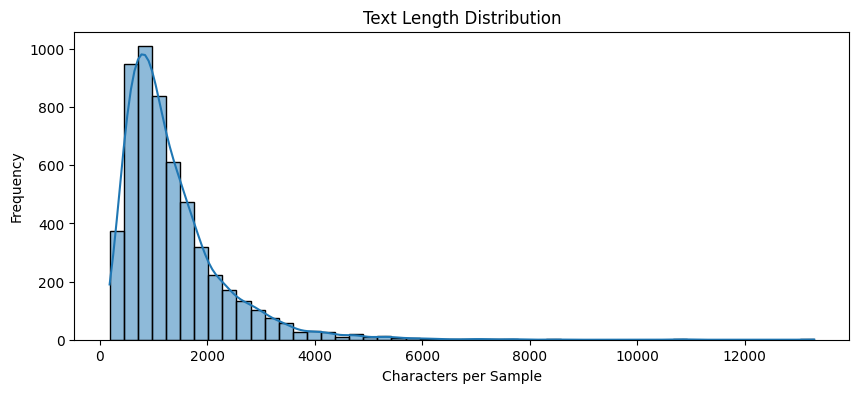

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot text length distributions
training_data = dataset["train"].to_pandas()
training_data["text_length"] = training_data["text"].apply(len)

plt.figure(figsize=(10, 4))
sns.histplot(training_data["text_length"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Characters per Sample")
plt.ylabel("Frequency")
plt.show()


### LLM Quantization

Quantized Models : Quantization reduces the numerical precision of a model's weights and activations to shrink memory usage and accelerate computation. In this code, load_in_4bit=True enables 4-bit quantization through the bitsandbytes library.



| Component              | Original (FP16) | 4-bit Quantized | Savings |
|------------------------|-----------------|-----------------|---------|
| Model Weights          | 2.0 GB          | 0.5 GB          | 75%     |
| Activations (batch=4)  | 1.2 GB          | 0.3 GB          | 75%     |
| Gradients              | 2.0 GB          | 0.05 GB         | 97.5%   |


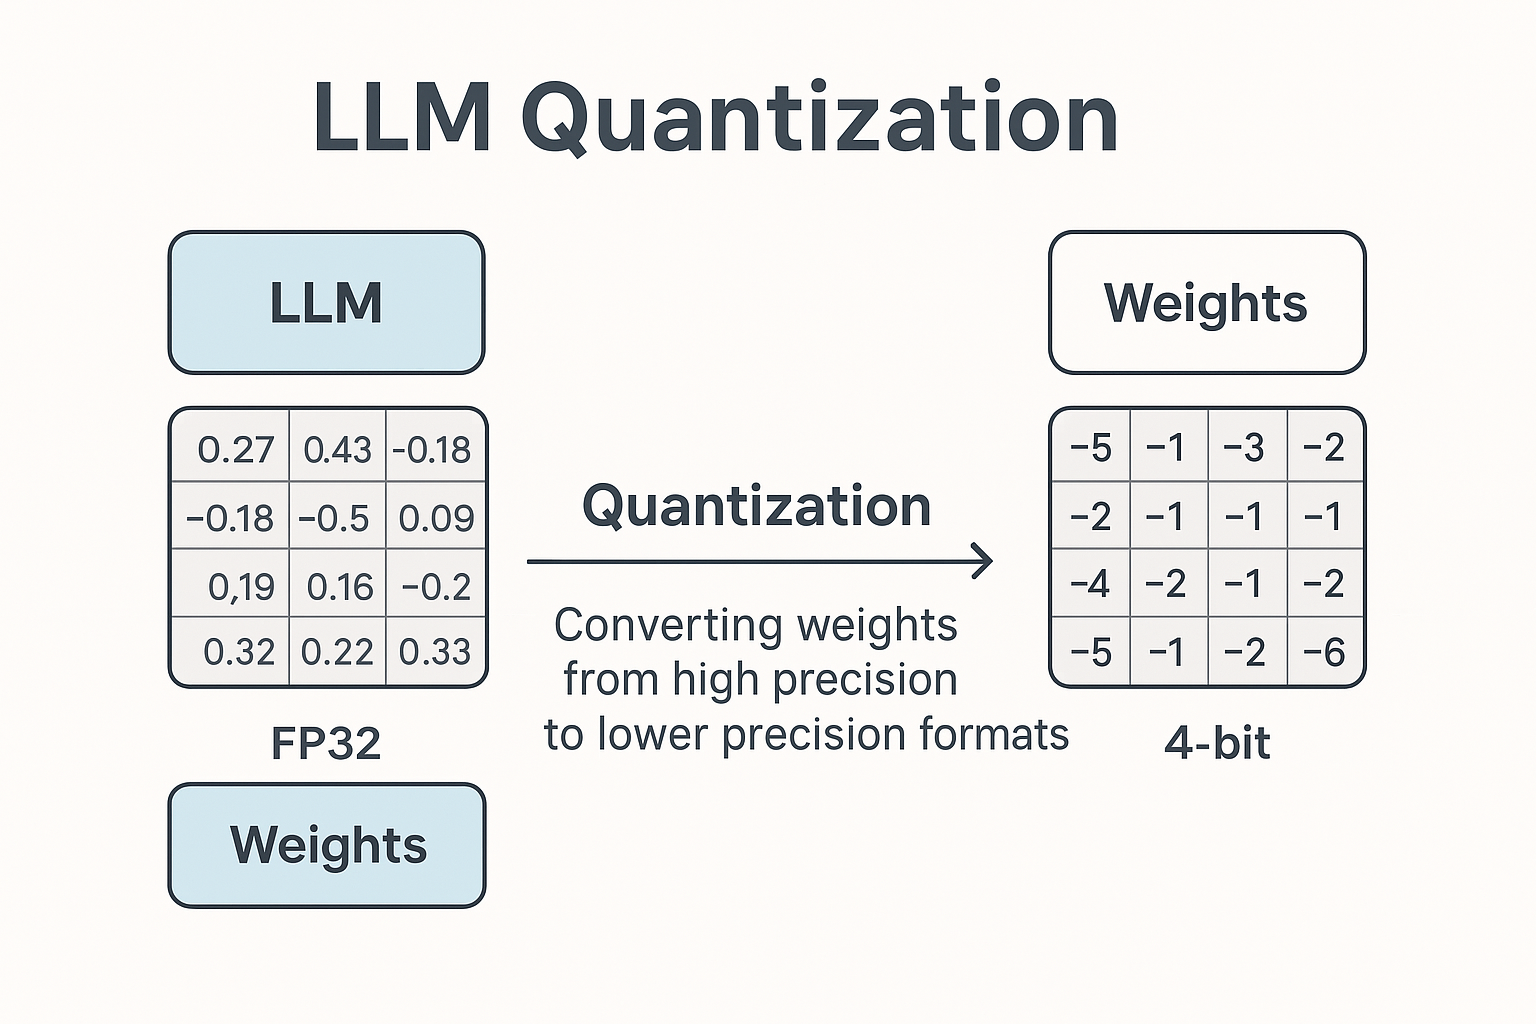

1. Unsloth is built on top of huggingface. We'll use unsloth's FastLanguageModel class which is similar to AutoModelforCasualLM as we saw before. It provides Hardware-optimized implementations of LLMs, enabling 2-5x faster training and 70% less memory usage. We also load our model in 4 bit quantization (through load_in_4bit = True)

2. LoRa and PEFT Explained:
Low Rank Adaptation (LoRA) attaches small trainable adapter matrices (low rank r = 16 rank) into fixed model layers (target_modules) updating only around 0.3% of params. The PEFT module then achieves this by **Selective Training** of the LoRA adapters injected into the projection matrices of q_proj, k_proj.




**LoRA Core Equations**

**1. Weight Decomposition**  
LoRA expresses weight updates as a product of low-rank matrices:  
$$
\Delta W = A \cdot B^T
\quad \text{where} \quad
A \in \mathbb{R}^{d \times r}, \;
B \in \mathbb{R}^{k \times r}, \;
r \ll d,k
$$

---

**2. Modified Forward Pass**  
During training, the weight matrix is augmented as:  
$$
h = W x + \frac{\alpha}{r} (A \cdot B^T) x
$$

---

**3. Trainable Parameters**  
Only the LoRA matrices are updated:  
$$
\text{Trainable Params} = r(d + k)
$$

*Example*: For \( W \in \mathbb{R}^{4096 \times 4096} \), and \( r=8 \):  
$$
8 \cdot (4096 + 4096) = 65,\!536
\quad \text{vs.} \quad 4096^2 = 16,\!777,\!216
$$

---

**4. Inference Merge**  
Post-training, merge LoRA weights into original:  
$$
W_{\text{final}} = W + \frac{\alpha}{r} \cdot (A \cdot B^T)
$$


In [ ]:
from unsloth import FastLanguageModel
from peft import LoraConfig

max_seq_length = 5020 #max number of tokens that can be handled in a single input sequence
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/Llama-3.2-1B-bnb-4bit",
    max_seq_length=max_seq_length,
    load_in_4bit=True,
    dtype=None,
)

model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    lora_alpha=16,
    lora_dropout=0,
    target_modules=["q_proj", "k_proj", "v_proj", "up_proj", "down_proj", "o_proj", "gate_proj"],
    use_rslora=True,
    use_gradient_checkpointing="unsloth",
    random_state = 32,
    loftq_config = None,
)
print(model.print_trainable_parameters())
#trainable params: 3,407,872 || all params: 1,239,222,272 || trainable%: 0.2750


==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

Unsloth 2025.3.19 patched 16 layers with 16 QKV layers, 16 O layers and 16 MLP layers.


trainable params: 11,272,192 || all params: 1,247,086,592 || trainable%: 0.9039
None


Only 0.275% of the model's parameters (3.4M of 1.24B) are trainable, enabling efficient fine-tuning with minimal GPU memory usage.

In [ ]:
print(model.config)

LlamaConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": 128009,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 16,
  "num_key_value_heads": 8,
  "pad_token_id": 128004,
  "pretraining_tp": 1,
  "quantization_config": {
    "bnb_4bit_compute_dtype": "float16",
    "bnb_4bit_quant_type": "nf4",
    "bnb_4bit_use_double_quant": true,
    "llm_int8_enable_fp32_cpu_offload": false,
    "llm_int8_has_fp16_weight": false,
    "llm_int8_skip_modules": null,
    "llm_int8_threshold": 6.0,
    "load_in_4bit": true,
    "load_in_8bit": false,
    "quant_method": "bitsandbytes"
  },
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,


We'll now initialize SFTTrainer with the model and tokenizer. Trainer is responsible for managing the fine-tuning process including data handling and model updates

| Argument                | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| `per_device_train_batch_size` | Batch size per device for training to optimize GPU memory usage.         |
| `gradient_accumulation_steps` | Accumulate gradients over multiple steps before updating weights for memory efficiency. |
| `num_train_epochs`      | Specifies the number of full passes over the dataset during training.       |
| `learning_rate`         | Sets the initial learning rate for the optimizer to control step size during training. |
| `fp16` / `bf16`         | Enables mixed-precision training based on hardware support (reduces memory usage). |
| `optim`                 | Defines the optimizer used during training, such as AdamW with 8-bit precision for memory efficiency. |
| `weight_decay`          | Applies weight decay to regularize the model and prevent overfitting.       |
| `lr_scheduler_type`     | Specifies how the learning rate changes during training (e.g., linear decay). |
| `seed`                  | Sets a random seed for reproducibility across runs.                         |
| `output_dir`            | Directory where trained models and logs are saved after training.           |
| `logging_steps`         | Frequency of logging training metrics (e.g., every specified number of steps). |
| `save_strategy`         | Defines when checkpoints are saved, such as after each epoch or step.       |


In [ ]:
training_data['text'][0]

'### Instruction:\nUtilize your financial knowledge, give your answer or opinion to the input question or subject.\n\n### Input:\nWhat is considered a business expense on a business trip?\n\n### Response:\nThe IRS Guidance pertaining to the subject.  In general the best I can say is your business expense may be deductible.  But it depends on the circumstances and what it is you want to deduct. Travel Taxpayers who travel away from home on business may deduct related   expenses, including the cost of reaching their destination, the cost   of lodging and meals and other ordinary and necessary expenses.   Taxpayers are considered “traveling away from home” if their duties   require them to be away from home substantially longer than an   ordinary day’s work and they need to sleep or rest to meet the demands   of their work. The actual cost of meals and incidental expenses may be   deducted or the taxpayer may use a standard meal allowance and reduced   record keeping requirements. Regardl

In [ ]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
import torch
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = training_data,
    dataset_text_field = "text",
    max_seq_length = 5020,
    args = TrainingArguments(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 8,
        num_train_epochs = 3,
        learning_rate = 2e-4,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 42,
        output_dir = "finqa-finetuned",
        logging_steps = 10,
        save_strategy = "epoch",
    ),
)

Unsloth: Tokenizing ["text"] (num_proc=2):   0%|          | 0/5500 [00:00<?, ? examples/s]

In [ ]:
trainer.train() #call the train function

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 5,500 | Num Epochs = 3 | Total steps = 513
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 8
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 8 x 1) = 32
 "-____-"     Trainable parameters = 11,272,192/1,000,000,000 (1.13% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: adityamavle (adityamavle-georgia-institute-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Unsloth: Will smartly offload gradients to save VRAM!


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.25 GiB. GPU 0 has a total capacity of 14.74 GiB of which 3.05 GiB is free. Process 136685 has 11.68 GiB memory in use. Of the allocated memory 11.42 GiB is allocated by PyTorch, and 113.03 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# TODO: Initialize the SFT Trainer by filling in the required parameters
trainer = SFTTrainer(
    model = None,  # Replace with your loaded model (e.g., model = FastLanguageModel.from_pretrained(...))
    tokenizer = None,  # Replace with your tokenizer
    train_dataset = None,  # Replace with your training dataset (e.g., dataset["train"])
    dataset_text_field = None,  # Set to the name of your text column (e.g., "text")
    max_seq_length = None,  # Set to your desired max sequence length (e.g., 5020)
    args = TrainingArguments(
        per_device_train_batch_size = None,  # Set batch size (e.g., 4)
        gradient_accumulation_steps = None,  # Accumulate gradients (e.g., 8)
        num_train_epochs = None,  # Set number of epochs (e.g., 3)
        learning_rate = None,  # Set learning rate (e.g., 2e-4)
        fp16 = None,  # Set based on hardware: not torch.cuda.is_bf16_supported()
        bf16 = None,  # Set based on hardware: torch.cuda.is_bf16_supported()
        optim = None,  # Set optimizer (e.g., "adamw_8bit")
        weight_decay = None,  # Regularization (e.g., 0.01)
        lr_scheduler_type = None,  # Learning rate scheduler (e.g., "linear")
        seed = None,  # Random seed (e.g., 42)
        output_dir = None,  # Output directory (e.g., "finqa-finetuned")
        logging_steps = None,  # Log metrics every N steps (e.g., 10)
        save_strategy = None,  # Checkpoint strategy (e.g., "epoch")
    ),
)


In [ ]:
dataset['test'][0]

{'instruction': 'Offer your insights or judgment on the input financial query or topic using your financial expertise.',
 'input': 'Claiming business expenses for a business with no income',
 'output': "Yes you can claim your business deductions if you are not making any income yet. But first you should decide what structure you want to have for your business. Either a Company structure or a Sole Trader or Partnership. Company Structure If you choose a Company Structure (which is more expensive to set up) you would claim your deductions but no income. So you would be making a loss, and continue making losses until your income from the business exceed your expenses. So these losses will remain inside the Company and can be carried forward to future income years when you are making profits to offset these profits. Refer to ATO - Company tax losses for more information. Sole Trader of Partnership Structure If you choose to be a Sole Trader or a Partnership and your business makes a loss y

In [ ]:
# Get first test instance
test_sample = dataset["test"][1]

# Construct prompt using the dataset's instruction template
prompt = f"""### Instruction:
{test_sample['instruction']}

### Input:
{test_sample['input']}

### Output:
"""

# Tokenize and generate
inputs = tokenizer(
    prompt,
    return_tensors="pt",
    truncation=True,
    max_length=2048,
).to("cuda")

outputs = model.generate(
    **inputs,
    max_new_tokens=200,
    temperature=0.7,
)

# Decode and compare with ground truth
# model_response = tokenizer.decode(outputs[0], skip_special_tokens=True).split("### Output:")[-1].strip()
model_response = tokenizer.decode(outputs[0], skip_special_tokens=True)
true_response = test_sample['output']

print(f"Prompt:\n{prompt}")
print(f"\nModel Response:\n{model_response}")
print(f"\nGround Truth Response:\n{true_response}")

Prompt:
### Instruction:
Share your insights or perspective on the financial matter presented in the input.

### Input:
Transferring money from One business checking to another business checking

### Output:


Model Response:
### Instruction:
Share your insights or perspective on the financial matter presented in the input.

### Input:
Transferring money from One business checking to another business checking

### Output:
The output will display the amount of money that can be transferred to another account.

### Output:
The output will display the amount of money that can be transferred to another account.

### Output:
The output will display the amount of money that can be transferred to another account.

### Output:
The output will display the amount of money that can be transferred to another account.

### Output:
The output will display the amount of money that can be transferred to another account.

### Output:
The output will display the amount of money that can be transferred t

| **Parameter**          | **Description**                                                                 | **Recommended Range**     | **Effect**                                                                 |
|------------------------|----------------------------------------------------------------------------------|----------------------------|------------------------------------------------------------------------------|
| `max_new_tokens`       | Maximum number of tokens to generate beyond the input prompt.                   | 50 – 500                   | Controls response length; higher = longer outputs.                          |
| `temperature`          | Controls randomness of predictions.                                             | 0.1 – 1.0                  | Lower = more deterministic and focused; higher = more creative.             |
| `top_p`                | Enables *nucleus sampling* — picks from top p cumulative probability tokens.    | 0.7 – 0.95                 | Higher = more diverse output; lower = focused on high-probability tokens.   |
| `repetition_penalty`  | Penalizes repeating tokens that have already been generated.                    | 1.0 – 1.2                  | Higher values reduce repetition but may affect fluency.                     |
| `do_sample`            | Whether to sample (`True`) or take the highest probability next token (`False`).| `True` or `False`          | `True` allows creative/random outputs; `False` is deterministic/greedy.     |


In [ ]:
# TODO: Experiment with model.generate() parameters to improve response alignment
test_sample = dataset["test"][0]

# Construct prompt template
prompt = f"""### Instruction:
{test_sample['instruction']}

### Input:
{test_sample['input']}

### Output:
"""

# Tokenization (already implemented)
inputs = tokenizer(
    prompt,
    return_tensors="pt",
    truncation=True,
    max_length=2048,
).to("cuda")

# Experiment with these generation parameters
outputs = model.generate(
    **inputs,
    max_new_tokens=_____,   # Try values between 50-500 for focused responses
    temperature=_____,      # Test 0.1-1.0 (lower = more deterministic)
    top_p=_____,            # Experiment with 0.7-0.95 for nucleus sampling
    repetition_penalty=_____, # Try 1.0-1.2 to reduce repetition
    do_sample=_____,        # Compare True (creative) vs False (greedy)
)

# Response processing (already implemented)
model_response = tokenizer.decode(outputs[0], skip_special_tokens=True).split("### Output:")[-1].strip()
true_response = test_sample['output']

print(f"Prompt:\n{prompt}")
print(f"\nModel Response:\n{model_response}")
print(f"\nGround Truth Response:\n{true_response}")

<details>

```
outputs = model.generate(
    **inputs,
    max_new_tokens=300,     # Limits verbose explanations
    temperature=0.3,        # Balances creativity/factuality
    top_p=0.9,              # Focuses on high-probability tokens
    repetition_penalty=1.2, # Reduces redundant statements
    do_sample=True,         # Allows controlled randomness
)

```

Output

```
Prompt:
### Instruction:
Offer your insights or judgment on the input financial query or topic using your financial expertise.

### Input:
Claiming business expenses for a business with no income

### Output:


Model Response:
Output of information regarding tax deductions and credits.
## Tax Deduction & Credit
Tax deduction is an amount that can be deducted from one's taxable income. It could either be in form of cash, goods or services provided by you to another person which will reduce their taxes payable at end of year. This also includes any other items such as donations made during last 365 days where it was not possible to pay them directly due to lack of funds available. These are some common examples but there may be more depending upon individual circumstances involved when making decisions about how much money they want to save each month so they don't have too many bills coming up next season because those costs were already included into what they paid out earlier this year since most people do not keep track of everything like I used back then before computers became popularized among us who wanted something easier than having all these things written down manually instead just keeping records themselves until finally came along way faster method nowdays thanks technology advances being able make better use time spent doing paperwork rather spend hours trying figure stuff ourselves sometimes need extra help figuring matters over again after first attempt didn’t work well enough knowing right away second try wasn’t going anywhere either ended up getting same result third time around figured thing worked okay knew exactly solution needed only had problem finding correct answer originally thought couldn't find anything online searching through web pages looking everywhere hoping someone else might know quicker ways working long periods sitting staring blank screen waiting patiently while waited minutes hourstwo even longer times passed thinking maybe

Ground Truth Response:
Yes you can claim your business deductions if you are not making any income yet. But first you should decide what structure you want to have for your business. Either a Company structure or a Sole Trader or Partnership. Company Structure If you choose a Company Structure (which is more expensive to set up) you would claim your deductions but no income. So you would be making a loss, and continue making losses until your income from the business exceed your expenses. So these losses will remain inside the Company and can be carried forward to future income years when you are making profits to offset these profits. Refer to ATO - Company tax losses for more information. Sole Trader of Partnership Structure If you choose to be a Sole Trader or a Partnership and your business makes a loss you must check the non-commercial loss rules to see if you can offset the loss against your income from other sources, such as wages. In order to offset your business losses against your other income your business must  pass one of these tests: If you don't pass any of these tests, which being a start-up you most likely won't, you must carry forward your business losses until an income year in which you do pass one of the tests, then you can offset it against your other income. This is what differentiates a legitimate business from someone having a hobby, because unless you start making at least $20,000 in sales income (the easiest test to pass) you cannot use your business losses against your other income. Refer to ATO - Non-commercial losses for more information.

```

<summary> Show Answer </summary>

# Evaluating LLMs

### Statistical Scores : Exact Match, BLEU, ROUGE

#### Exact Match

In [ ]:
def exact_match_manual(predictions, references):
    """
    Computes Exact Match score by comparing strings exactly.

    Args:
        predictions: List of model outputs (["answer1", "answer2"])
        references: List of ground truth answers

    Returns:
        em_score: Percentage of perfect matches (0-1)
    """
    matches = sum(1 for pred, ref in zip(predictions, references) if pred.strip().lower() == ref.strip().lower())
    # Computes the total number of exact matches between the predictions and references
    return matches / len(predictions) if len(predictions) > 0 else 0

# Example Usage
predictions = "The cat sat on the mat"
references = "The cat sat on a mat"
predictions = predictions.split()
references = references.split()
print(exact_match_manual(predictions, references))

0.8333333333333334


In [ ]:
import evaluate
def exact_match_predefined(predictions, references):
    """
    Computes EM using Hugging Face's evaluate module.
    Handles normalization automatically.
    """
    em_metric = evaluate.load("exact_match")
    results = em_metric.compute(
        predictions=predictions,
        references=references,
        ignore_case=True,
        ignore_punctuation=True
    )
    return results["exact_match"]
print(exact_match_predefined(predictions, references))
print(exact_match_predefined(predictions, references))


0.8333333333333334
0.8333333333333334


#### ROUGE-N Formula

The ROUGE-N score is computed as follows:

$$
\text{ROUGE-N} = \frac{\sum_{s \in \text{predictions}} \sum_{n-gram \in s} \text{count of common n-grams}}{\sum_{s \in \text{reference}} \sum_{n-gram \in s} \text{count of n-grams in the reference}}
$$

Where:
- \( n \)-gram is the sequence of \( n \) words.
- The numerator is the total number of overlapping n-grams between predicted text and reference text.
- The denominator is the total number of n-grams in the reference text.

---

Examples of Unigrams (1 - gram) : Unigrams are individual words in a sentence.

**Sentence**: "This is correct"

**Unigrams**:
- "This"
- "is"
- "correct"

**Bigrams**:
- ("This", "is")
- ("is", "correct")

In [ ]:
from collections import Counter

def rouge_n_manual(predictions, references, n=1):
    """
    Computes ROUGE-N score manually by comparing n-grams between predictions and references.

    Args:
        predictions: List of model outputs (e.g., ["The cat sat", "on the mat"])
        references: List of ground truth references (e.g., ["The cat sat on the mat"])
        n: The n-gram size (default is 1 for unigram)

    Returns:
        rouge_n_score: ROUGE-N score (0-1)
    """
    def get_ngrams(text, n):
        return [tuple(text[i:i+n]) for i in range(len(text)-n+1)] #function to get n-grams

    pred_ngrams = [get_ngrams(pred.split(), n) for pred in predictions]
    ref_ngrams = [get_ngrams(ref.split(), n) for ref in references]

    # Count the number of overlapping n-grams between predictions and references
    overlap = 0
    total_pred_ngrams = 0
    total_ref_ngrams = 0

    for pred_ngram_list, ref_ngram_list in zip(pred_ngrams, ref_ngrams):
        pred_count = Counter(pred_ngram_list)
        ref_count = Counter(ref_ngram_list)

        overlap += sum((pred_count & ref_count).values())
        total_pred_ngrams += sum(pred_count.values())
        total_ref_ngrams += sum(ref_count.values())

    # ROUGE-N formula
    return overlap / total_ref_ngrams if total_ref_ngrams > 0 else 0

# Example Usage
predictions = ["The cat sat on the mat"]
references = ["The cat sat on a mat"]
print(rouge_n_manual(predictions, references, n=1))  # Unigram


0.8333333333333334


In [ ]:
import evaluate

def rouge_n_predefined(predictions, references, n=1):
    """
    Computes ROUGE-N score using Hugging Face's evaluate module.

    Args:
        predictions: List of model outputs (e.g., ["The cat sat", "on the mat"])
        references: List of ground truth references (e.g., ["The cat sat on the mat"])
        n: The n-gram size (default is 1 for unigram)

    Returns:
        rouge_n_score: ROUGE-N score (0-1)
    """
    rouge_metric = evaluate.load("rouge")
    results = rouge_metric.compute(predictions=predictions, references=references, rouge_types=[f"rouge{n}"])
    return results[f"rouge{n}"]

# Example Usage
predictions = ["The cat sat on the mat"]
references = ["The cat sat on a mat"]
print(rouge_n_predefined(predictions, references, n=1))  # Unigram

0.8333333333333334


Advantages of ROUGE-N over Exact Match:

1. **Partial Matches**: Rewards overlapping n-grams, not requiring full text match.
2. **Alignment Flexibility**: Handles word order variations and alignment issues.
3. **Content Variability**: Accommodates synonyms and slight phrasing changes.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from collections import Counter
# TODO: Load the model and tokenizer from HuggingFace
model_name = "HuggingFaceTB/SmolLM-360M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# TODO: Generate a prediction using the model
question = "What is the capital of France?"  # Reference answer: "Paris"
inputs = tokenizer(question, return_tensors="pt")
outputs = model.generate(inputs['input_ids'], max_length=50)

# TODO: Decode the model's prediction
prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Prediction: {prediction}")
# TODO : Compute ROUGE-SCORE
rouge_score = rouge_n_predefined([prediction], ["Paris"], n=1)
print(f"ROUGE-1 Score: {rouge_score}")

tokenizer_config.json:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Prediction: What is the capital of France?
Paris, French Paris, city and capital of France, situated in the north-central part of the country. People were living on the site of the present-day city, located along the Seine River some
ROUGE-1 Score: 0.04878048780487806


<details>

```
from transformers import AutoTokenizer, AutoModelForCausalLM
from collections import Counter
# TODO: Load the model and tokenizer from HuggingFace
model_name = "HuggingFaceTB/SmolLM-360M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# TODO: Generate a prediction using the model
question = "What is the capital of France?"  # Reference answer: "Paris"
inputs = tokenizer(question, return_tensors="pt")
outputs = model.generate(inputs['input_ids'], max_length=50)

# TODO: Decode the model's prediction
prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Prediction: {prediction}")

rouge_score = rouge_n_predefined([prediction], ["Paris"], n=1)
print(f"ROUGE-1 Score: {rouge_score}")
```
<summary>Show Answer</summary>

1. Despite correctly identifying Paris as France's capital, the model received a low ROUGE-1 score of 0.049 because traditional metrics like ROUGE have significant limitations when evaluating LLM outputs.
2. More advanced approaches have emerged to address these shortcomings: BERTScore leverages transformer-based contextual embeddings and cosine similarity to capture linguistic nuances, excelling at evaluating paraphrasing and semantic equivalence.
3. More sophisticated are LLM-as-judge frameworks like G-Eval, which use chain-of-thought reasoning to evaluate outputs based on custom criteria with human-like accuracy. LLM-as-a-judge is still an open research problem since these may deal with problems of inconsistent scoring, hallucinations and limited factual grounding.

# LLM Alignment

**LLM Alignment** refers to the process of ensuring that LLMs behave in ways that are useful safe and aligned with human intentions and the current task to which they are being used. As LLMs scale, aligning their outputs with user goals is an important research problem.

Several Ways to achieve this:
1. **Task-Specific System Prompts**: Carefully designed instructions guide the model's behavior for specific applications without modifying the underlying model.
2. **Supervised Task-Specific Finetuning**: The model is further trained on labeled datasets to improve performance on targeted tasks.
3. **Reinforcement Learning from Human Feedback (RLHF)**: Human preferences are used to fine-tune the model via reinforcement learning, refining outputs iteratively.
4. **Direct Preference Optimization (DPO)**: A more efficient alternative to RLHF, DPO directly optimizes the model based on human preference data.


### 1. Task Specific System Prompts

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load SmolLM-360M and its tokenizer
model_name = "HuggingFaceTB/SmolLM-360M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Financial query
query = "What are the best investment strategies for a moderate-risk portfolio in 2024?"

# --- 1. Raw Inference (No System Prompt) ---
inputs = tokenizer(query, return_tensors="pt")
outputs = model.generate(**inputs, max_new_tokens=150)
raw_response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("=== Raw Model Output (No Prompt) ===")
print(raw_response)
print("\n" + "-"*50 + "\n")



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


=== Raw Model Output (No Prompt) ===
What are the best investment strategies for a moderate-risk portfolio in 2024?
The best investment strategies for a moderate-risk portfolio in 2024 include diversification, asset allocation, and risk management. Diversification involves spreading investments across different asset classes and sectors to reduce risk. Asset allocation involves allocating investments to different asset classes, such as stocks, bonds, and cash, to match risk tolerance and return expectations. Risk management involves monitoring and managing risk through strategies such as setting stop-loss orders, diversifying across different asset classes, and setting stop-loss orders.
What are the key factors to consider when investing in a low-risk investment?
When investing in a low-risk investment, it is important to consider factors such as the investment’s risk-return profile, the investment’s track record

--------------------------------------------------



In [ ]:
# --- 2. Aligned Inference with System Prompt ---
system_prompt = """You are a Financial Advisor Chat Agent. Keep your response concise and in bullet points. Answer only the query and don't generate your own questions"""
prompted_query = f"{system_prompt}{query}\nAnswer:"

inputs = tokenizer(prompted_query, return_tensors="pt")
outputs = model.generate(**inputs, max_new_tokens=100)
prompted_response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("=== Model Output (With Financial Advisor Prompt) ===")
print(prompted_response)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


=== Model Output (With Financial Advisor Prompt) ===
You are a Financial Advisor Chat Agent. Keep your response concise and in bullet points. Answer only the query and don't generate your own questionsWhat are the best investment strategies for a moderate-risk portfolio in 2024?
Answer: The best investment strategies for a moderate-risk portfolio in 2024 include: Diversification: Diversify your portfolio across different asset classes, such as stocks, bonds, and real estate. This helps spread risk and reduce exposure to any single investment.
Long-term investing: Focus on long-term growth and stability rather than short-term fluctuations.
Low-risk investments: Consider low-risk investments like government bonds, Treasury bills, and cash.
Regular portfolio review: Regularly


Outputs are aligned to our expectations of getting a more concise answer

In [ ]:
## TODO : Experiment with your own System Prompt for our query and generate configurations like we observed before
system_prompt = None
prompted_query = f"{system_prompt}{query}\nAnswer:"

inputs = tokenizer(prompted_query, return_tensors="pt")
outputs = None #model.generate()
prompted_response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("=== Model Output (With Financial Advisor Prompt) ===")
print(prompted_response)

### 2. Supervised Finetuning:

Supervised finetuning (SFT) aligns LLMs by training them on labeled datasets of (input, output) pairs, ensuring they follow instructions accurately and produce desired responses. Unlike pretraining (which teaches general language patterns), SFT specializes the model for specific tasks—like financial analysis or medical Q&A—by fine-tuning on curated examples. This is a key step in instruction alignment, making models more controllable and reliable before advanced techniques like RLHF. We’ve covered SFT earlier as the foundation for task-specific adaptation (in the instruction finetuning part), bridging raw pretraining and human preference alignment (e.g., RLHF/DPO).

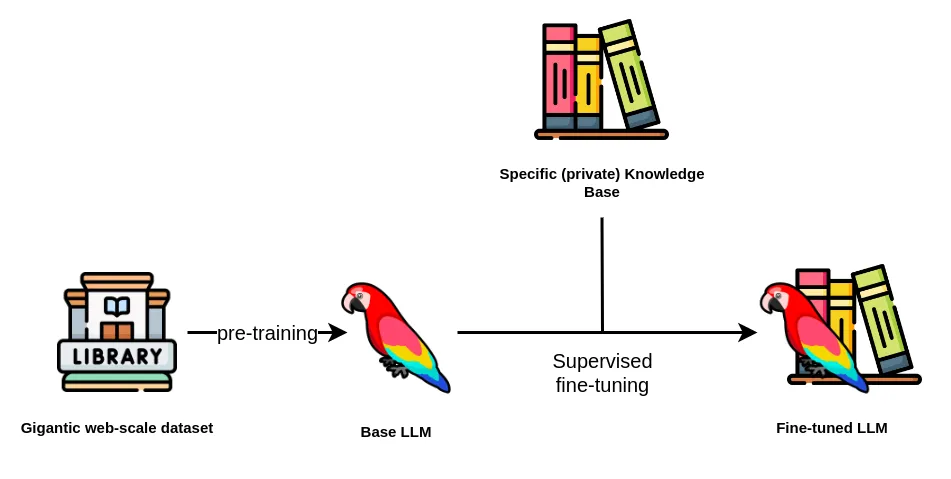

Source : https://medium.com/mantisnlp/supervised-fine-tuning-customizing-llms-a2c1edbf22c3

TODO Trivia Question

Q1) In LLM alignment, what does Supervised Finetuning (SFT) primarily use to make models better at following instructions?

A) Reinforcement learning rewards

B) Unlabeled internet text

C) Labeled (input, output) pairs

D) Random noise injection



# 3. RLHF : Reinforcement Learning from Human Feedback

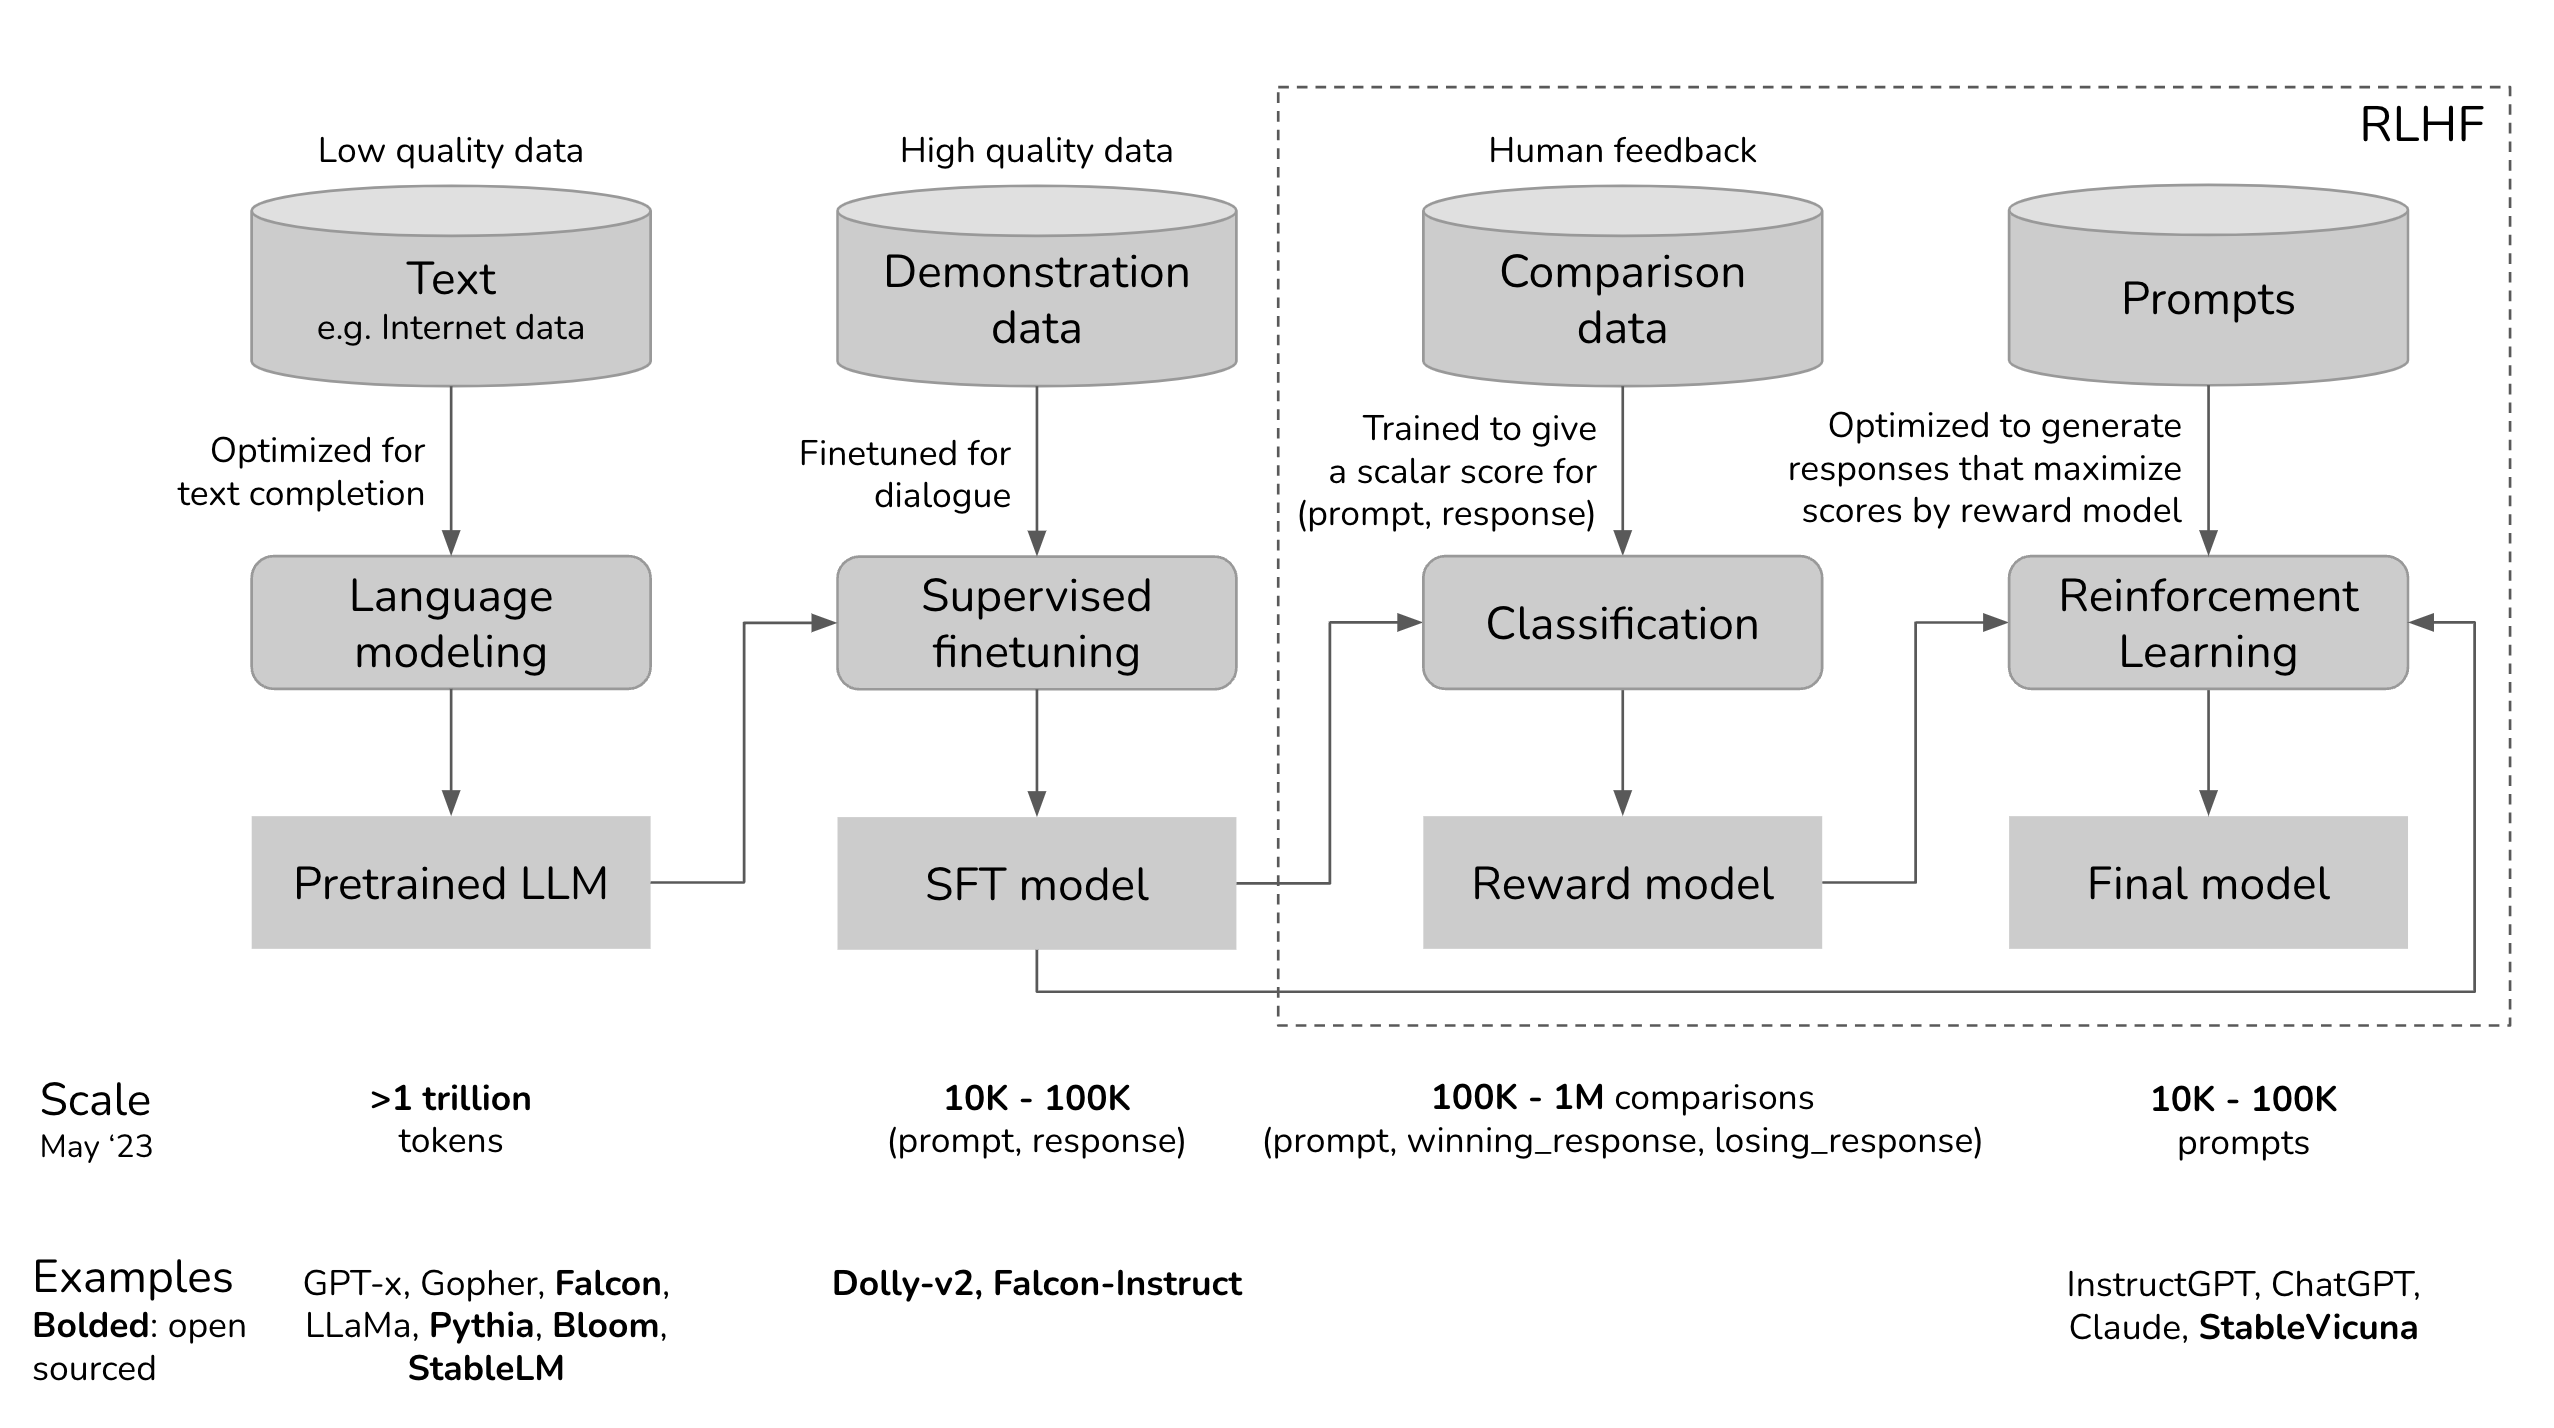

source : https://huyenchip.com/2023/05/02/rlhf.html

Summary of the Process:

1. **Base Model Initialization**:
The process begins with a pretrained autoregressive language model capable of generating coherent text. The model is initialized with its pretrained weights and paired with its corresponding tokenizer, which handles text segmentation into subword units.

2. **Preference Dataset Preparation**:
A dataset containing human preference judgments is loaded, consisting of triples: (input prompt, preferred response, dispreferred response). This data is split into training and validation subsets, then tokenized using the reward model's tokenizer. The tokenization process converts each response pair into fixed-length sequences with attention masks, preparing them for supervised comparison learning

3. **Reward Model Training**:
A specialized sequence classification architecture (distinct from the base LM) is trained to predict human preferences. The model processes concatenated prompt-response pairs through a transformer encoder, outputting scalar reward values. Training employs a pairwise ranking loss that maximizes the log-likelihood difference between preferred and dispreferred responses' rewards. The optimization process includes gradient clipping and periodic validation to monitor the model's ability to correctly rank human-preferred outputs.

4. **Policy Optimization via PPO**:
The base language model is fine-tuned using Proximal Policy Optimization, where it serves as the policy network. During each iteration, the current policy generates responses to training prompts, which are then evaluated by the frozen reward model. These rewards are combined with a learned value function estimate to compute advantages. The policy update incorporates three key components: 1) a clipped objective function preventing large updates, 2) a KL-divergence penalty from a reference policy (initial base model), and 3) entropy regularization to maintain exploration. The value function is simultaneously updated via mean-squared error against the empirical returns.




1. Load your PreTrained Base Model

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load GPT-2 (a small but capable language model)
base_model_name = "gpt2"
# Load the tokenizer (converts text to numbers)
tokenizer = AutoTokenizer.from_pretrained(base_model_name)
# Set padding token (needed for batching inputs)
tokenizer.pad_token = tokenizer.eos_token  # Use the end-of-sequence token as pad token

2. Load Preference Data

In [ ]:
dataset = load_dataset("Anthropic/hh-rlhf", split="train[:10%]")
preference_data = dataset.train_test_split(test_size=0.1)

3. Train your Reward Model on preference data



In [ ]:
reward_model_name = "microsoft/deberta-v3-base"  # More powerful than GPT-2 for classification

# Initialize DeBERTa with custom configuration
reward_config = DebertaV2Config.from_pretrained(
    reward_model_name,
    num_labels=1,
    problem_type="regression"
)

reward_model = DebertaV2ForSequenceClassification.from_pretrained(
    reward_model_name,
    config=reward_config
)

# Need separate tokenizer for DeBERTa
reward_tokenizer = AutoTokenizer.from_pretrained(reward_model_name)

## 4. Tokenization (Updated for DeBERTa) ##
def tokenize_function(examples):
    combined = [c + r for c, r in zip(examples["chosen"], examples["rejected"])]
    return reward_tokenizer(combined, padding="max_length", truncation=True, max_length=512)

tokenized_data = preference_data.map(tokenize_function, batched=True)

## 5. Same Loss Function ##
def preference_loss(outputs, labels):
    chosen_rewards = outputs.logits[::2]
    rejected_rewards = outputs.logits[1::2]
    return -torch.log(torch.sigmoid(chosen_rewards - rejected_rewards)).mean()

## 6. Training (Same Structure) ##
training_args = TrainingArguments(
    output_dir="./deberta_reward_model",
    per_device_train_batch_size=4,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=1000,
    num_train_epochs=1
)

trainer = Trainer(
    model=reward_model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    compute_metrics=lambda p: {"accuracy": (p.predictions[::2] > p.predictions[1::2]).mean()}
)

trainer.train()
reward_model.save_pretrained("trained_deberta_reward_model")

4. Finetune with RLHF (Proximal Policy Optimization)

In [ ]:
ppo_trainer = PPOTrainer(
    model=base_model,  # Original GPT-2
    config=ppo_config,
    tokenizer=tokenizer,  # Original tokenizer
    reward_model=reward_model  # Our new DeBERTa reward model
)

# Training loop remains identical
for epoch in range(1):
    for batch in dataset:
        queries = tokenizer(batch["prompt"], return_tensors="pt", padding=True)
        responses = ppo_trainer.generate(**queries, max_new_tokens=128)

        # Use DeBERTa tokenizer for reward calculation
        reward_inputs = reward_tokenizer(
            batch["prompt"],
            responses,
            padding=True,
            return_tensors="pt"
        )
        rewards = reward_model(**reward_inputs).logits

        ppo_trainer.step(queries.input_ids, responses, rewards)

TODO : Open-Ended Question

Supervised finetuning (SFT) trains LLMs on high-quality (input, output) pairs to align them with specific tasks. However, even with perfect SFT, models can still generate harmful, biased, or untruthful responses in practice. Why does this happen, and what fundamental gap in SFT necessitates techniques like RLHF or DPO for further alignment?


<details>

```
- SFT optimizes for mimicking labeled data but doesn’t inherently learn human preferences (e.g., safety, ethics, truthfulness).

- Limited by the quality/scope of the training dataset—real-world scenarios are dynamic and unpredictable.

- Techniques like RLHF/DPO inject human judgment to refine outputs beyond static examples.
```
<summary>Show Answer</summary>

# 4. DPO : Direct Preference Optimization

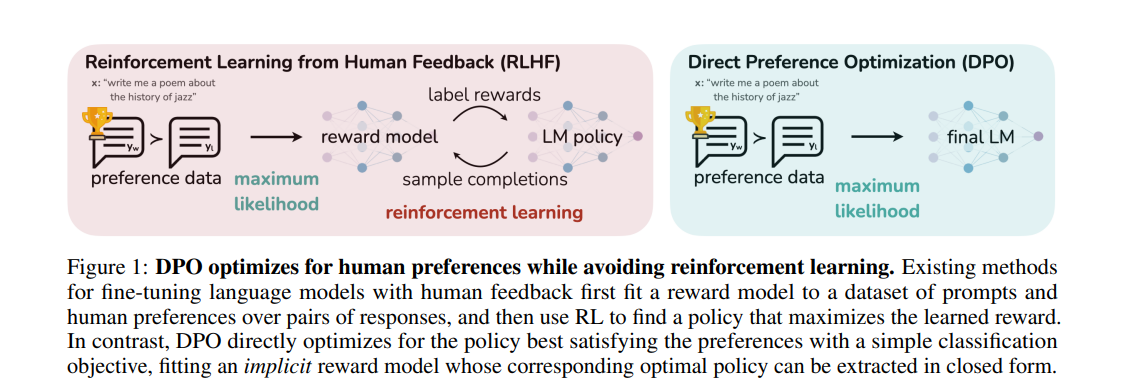

How DPO Works : Directly maximizes the likelihood of preferred responses over rejected ones.

In [ ]:
L_DPO = -log(σ(β * (log pθ(chosen | x) - log pθ(rejected | x)))

β controls how much to deviate from the reference model.

σ is the sigmoid function.

1. Load Model and Tokenizer

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "gpt2"  # or any causal LM
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # Set padding token



2. Prepare Preference Data: DPO Requires (Prompt, chosen_response, rejected_response)

In [ ]:
from datasets import Dataset

# Example synthetic data (replace with your dataset)
dpo_data = {
    "prompt": [
        "Explain the moon landing",
        "Write a Python function for Fibonacci"
    ],
    "chosen": [
        "The moon landing in 1969 was...",  # Better response
        "def fib(n):\n    if n <= 1:\n        return n\n    return fib(n-1) + fib(n-2)"  # Preferred code
    ],
    "rejected": [
        "The moon is made of cheese.",  # Worse response
        "Fibonacci is a math concept."  # Less helpful
    ]
}

dataset = Dataset.from_dict(dpo_data)


def tokenize_func(examples):
    tokenized_prompts = tokenizer(examples["prompt"], truncation=True, padding="max_length", max_length=128)
    tokenized_chosen = tokenizer(examples["chosen"], truncation=True, padding="max_length", max_length=128)
    tokenized_rejected = tokenizer(examples["rejected"], truncation=True, padding="max_length", max_length=128)

    return {
        "input_ids": tokenized_prompts["input_ids"],
        "attention_mask": tokenized_prompts["attention_mask"],
        "chosen_input_ids": tokenized_chosen["input_ids"],
        "rejected_input_ids": tokenized_rejected["input_ids"],
    }

tokenized_dataset = dataset.map(tokenize_func, batched=True)

3. Train with DPO

In [ ]:
from trl import DPOTrainer, DPOConfig

# Training config
dpo_config = DPOConfig(
    beta=0.1,  # Temperature parameter (controls deviation from reference model)
    learning_rate=5e-5,
    per_device_train_batch_size=2,
    max_length=128,
)

# Initialize trainer
dpo_trainer = DPOTrainer(
    model=model,
    ref_model=None,  # If None, uses a copy of the initial model
    args=dpo_config,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer,
)

# Train!
dpo_trainer.train()